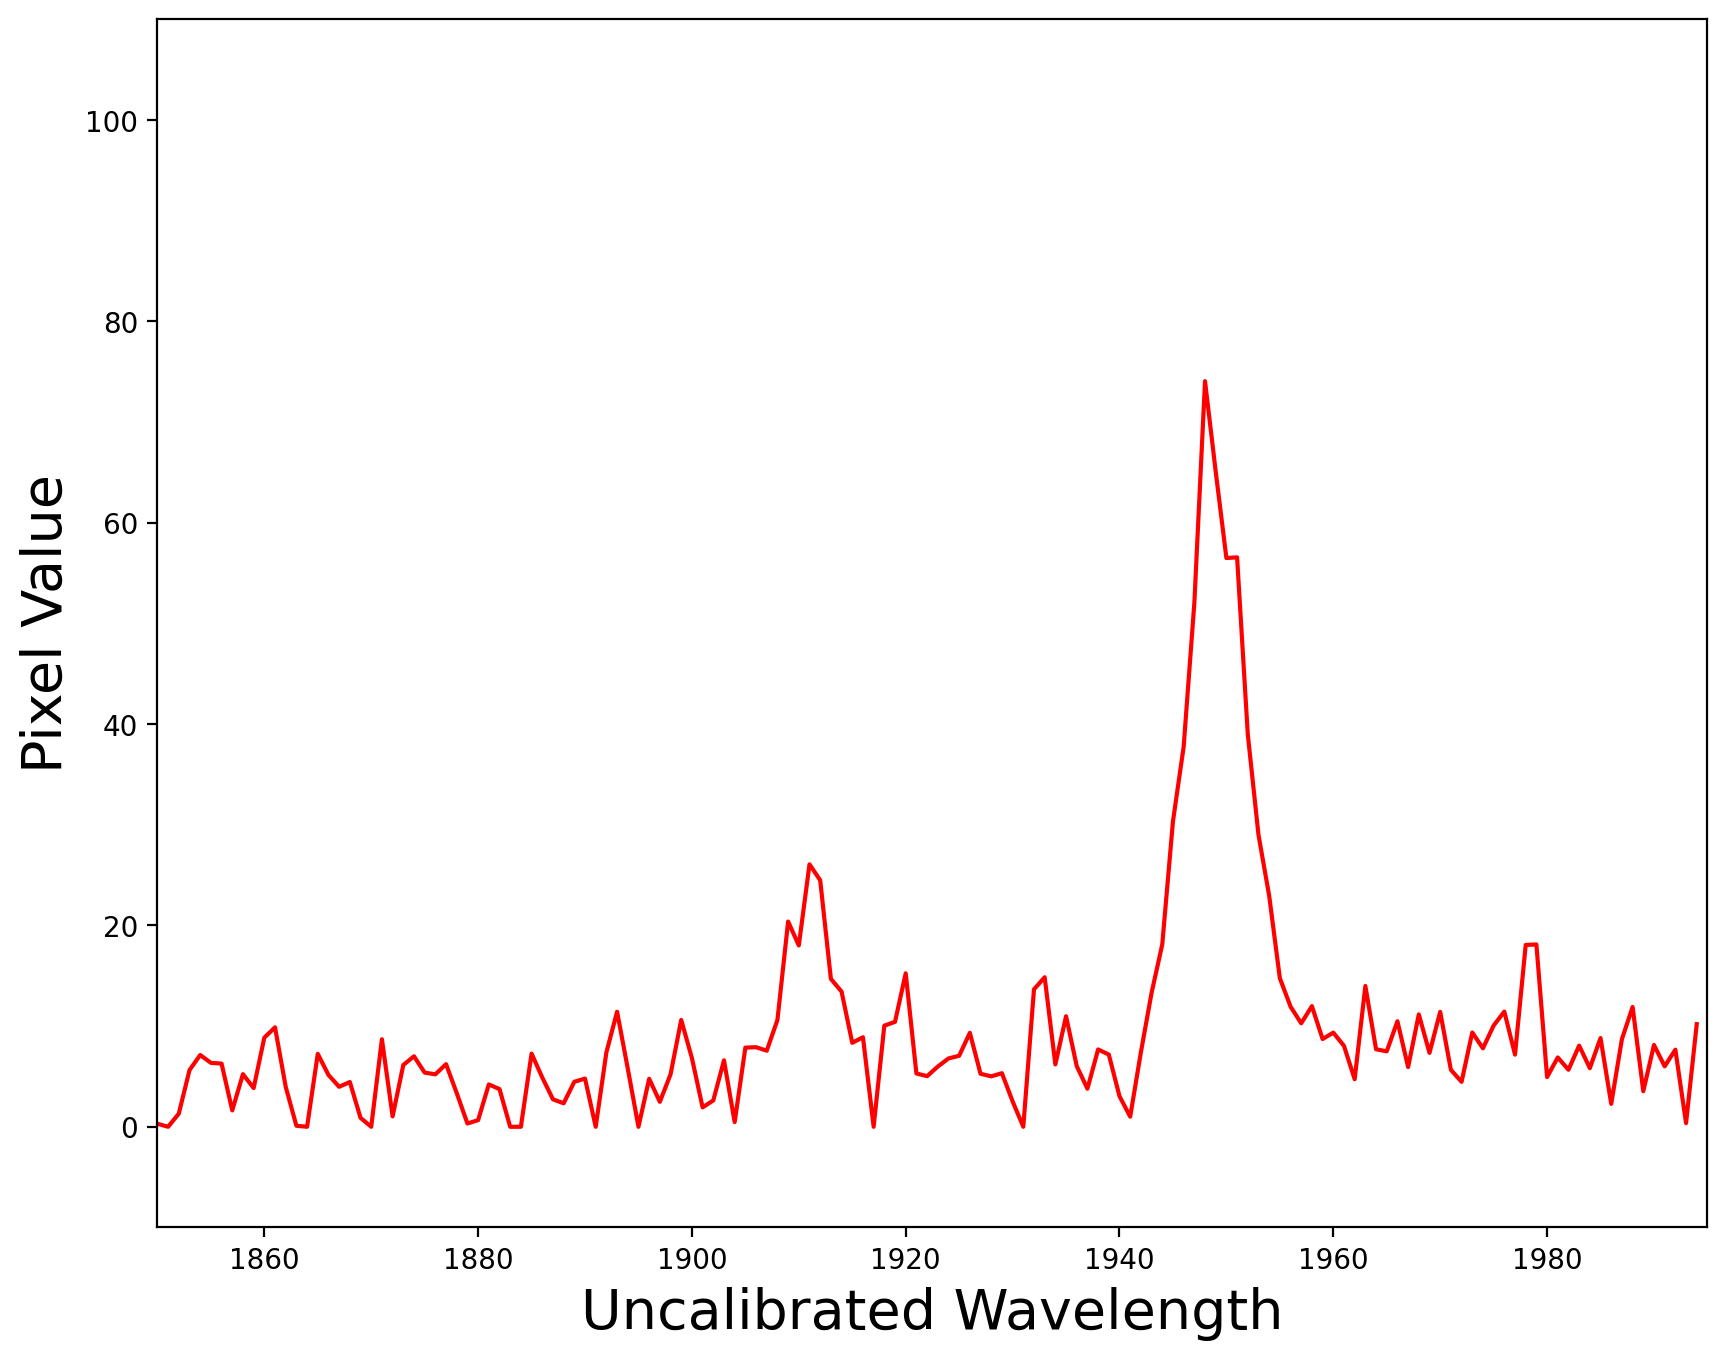

In [1]:
###### import astropy as ap
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
from pathlib import Path
from astropy.nddata import CCDData
from ccdproc import ImageFileCollection
import ccdproc as ccdp
from os import listdir, walk
import astropy.units as u
import sys

# this function converts the class astropy.io.fits.hdulist.HDUList to a numpy array as ccd data

fitsfile = fits.open("img/HLXSpectrum.fits")
def spec(fitsfile):
    
    specList = fits.open("img/HLXSpectrum.fits", include_path=True)
    imgList = []
    for img in specList:
        ccd = CCDData(fitsfile[0].data, unit="adu")
        HLX = ccdp.trim_image(ccd, fits_section="[:2050, 480:840]")
        imgList.append(ccd)
        fitsfile.close()
    
    specImg = CCDData(ccd, unit="adu")
    return specImg
specImg = spec(fitsfile)

# this section crops the image to eradicate nan values in the array

skyarray1 = specImg[200:205, 50:2045]
spectrum1 = np.array(skyarray1)

skyarray2 = specImg[200:350, 50:2045]
spectrum2 = np.array(skyarray2)

# spectrum = spectrum1 - spectrum2

fluxA = []
pixelA = []
for i in range(len(spectrum1[1])): # cropped img in x dimension
    fluxA.append(np.sum(spectrum1[:, i]))
    pixelA.append(i)

fluxB = []
pixelB = []
for i in range(len(spectrum2[1])):
    fluxB.append(np.sum(spectrum2[:, i]))
    pixelB.append(i)

myInt = 30
fluxNew = [x / myInt for x in fluxB]
flux = np.subtract(fluxA, fluxNew)

fix = np.where(flux < 1200, flux, 0*flux) # it is not a 1:1 translation of values for ds9 and the numpy array
fix2 = np.where(fix < 0, 0*fix, fix)

# this iterative loop with a conditional examines the numpy array for the first 1626 elements and changes the extreme values to zeros
for i in range(0, 1625):
    if fix2[i] >= 100:
        fix2[i] = 0
        
# np.set_printoptions(threshold=sys.maxsize)
# print(type(fix2))
# print(type(flux))
# print(fix2)

plt.figure(figsize=(10, 8), dpi=200)
plt.plot(pixelA, fix2, color="red")
fig1 = plt.gcf()
plt.ylim(-10,110)
plt.xlim(1850, 1995)
plt.xlabel("Uncalibrated Wavelength", fontsize=20)
plt.ylabel("Pixel Value", fontsize=20)
plt.show()
# fig1.savefig("emission_197-202.png", dpi=800)
